In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
df = pd.DataFrame({
    "name": [
        "naive neural network",
        "naive neural network",
        "naive LSTM",
        "naive LSTM",
        "context LSTM",
        "context LSTM",
        "LSTM + Power",
        "LSTM + Power",
        "Context LSTM + Power",
        "Context LSTM + Power",
    ],
    "who": [
        "sender",
        "receiver",
        "sender",
        "receiver",
        "sender",
        "receiver",
        "sender",
        "receiver",
        "sender",
        "receiver",
    ],
    "f1-true": [
        0.92,
        0.94,

        0.93,
        0.94,

        0.93,
        0.94,

        0.95,
        0.96,

        0.94,
        0.93,
    ],
    "f1-false": [
        0.11,
        0.11,

        0.12,
        0.08,

        0.17,
        0.09,

        0.02,
        0.01,

        0.12,
        0.14,
    ],
    "f1-macro-average": [
        0.51,
        0.52,

        0.53,
        0.51,

        0.55,
        0.52,

        0.48,
        0.48,

        0.53,
        0.53
    ]
})

df

,name,who,f1-true,f1-false,f1-macro-average
0,naive neural network,sender,0.92,0.11,0.51
1,naive neural network,receiver,0.94,0.11,0.52
2,naive LSTM,sender,0.93,0.12,0.53
3,naive LSTM,receiver,0.94,0.08,0.51
4,context LSTM,sender,0.93,0.17,0.55
5,context LSTM,receiver,0.94,0.09,0.52
6,LSTM + Power,sender,0.95,0.02,0.48
7,LSTM + Power,receiver,0.96,0.01,0.48
8,Context LSTM + Power,sender,0.94,0.12,0.53
9,Context LSTM + Power,receiver,0.93,0.14,0.53


In [41]:
def barh_score(df: pd.DataFrame, who: str, what: str, xOffset: float = 0.01) -> None:
    fig, ax = plt.subplots(nrows=3, ncols=2)

    for (i,who) in enumerate(["sender", "receiver"]):
        for (j,what) in enumerate(["true", "false", "macro-average"]):
            df_temp = df[df["who"] == who].sort_index(ascending=False).set_index("name")[f"f1-{what}"]
            # df_temp.plot.barh(figsize=(3,2))
            ax[j][i].plot.barh(df_temp)
            # for (i,v) in enumerate(df_temp):
            #     plt.text(v - xOffset, i, f"{v:.2f}", ha="right", va="center", color="white")
            # plt.title(f"{who} - \"{what}\" f1 scores")
    plt.show()

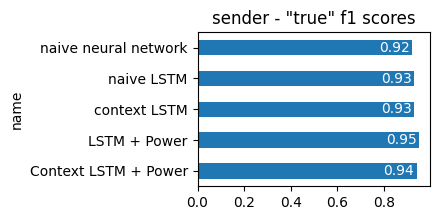

In [35]:
barh_score(df, "sender", "true")

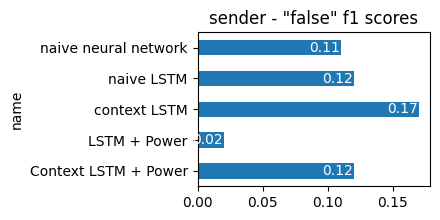

In [40]:
barh_score(df, "sender", "false", 0.001)

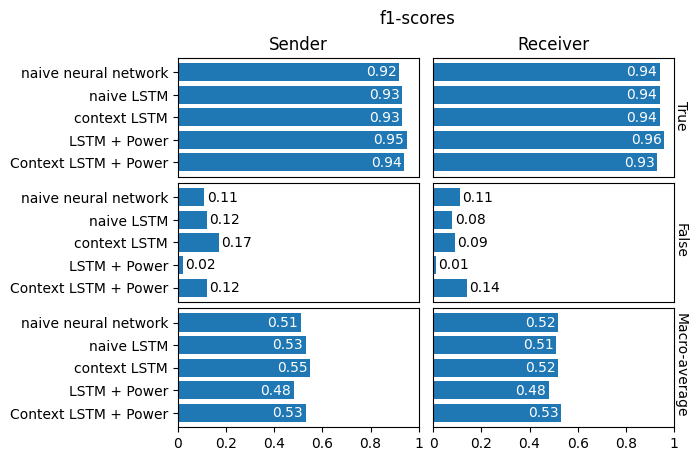

In [111]:
fig, ax = plt.subplots(nrows=3, ncols=2)
plt.subplots_adjust(wspace=0.06, hspace=0.05)
plt.suptitle("f1-scores")
for (i,who) in enumerate(["sender", "receiver"]):
    ax[0][i].set_title(who.capitalize())
    for (j,what) in enumerate(["true", "false", "macro-average"]):
        ax[j][i].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        ax[j][i].set_xticklabels([0, 0.2, 0.4, 0.6, 0.8, 1])
        if i > 0:
            ax[j][i].get_yaxis().set_visible(False)
            ax[j][i].annotate(what.capitalize(), xy=(1.0,2.1), ha="left", va="center", rotation=-90)
        if j < 2:
            ax[j][i].get_xaxis().set_visible(False)

        df_temp = df[df["who"] == who].sort_index(ascending=False).set_index("name")[f"f1-{what}"]
        ax[j][i].barh(df_temp.index, df_temp)
        ax[j][i].set_xlim([0.0, 1.0])
        for (y,v) in enumerate(df_temp):
            ax[j][i].text(v + (0.01 * (-1 if j != 1 else 1)), y, f"{v:.2f}", ha=("right" if j != 1 else "left"), va="center", color=("white" if j != 1 else "black"))
plt.show()